<a href="https://colab.research.google.com/github/FedeManrupe/FLACSO_final/blob/main/FLACSO_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importaciones 1
import pandas as pd
import numpy as np

In [2]:
#importaciones 2
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#recupero el documento csv
df = pd.read_csv('https://github.com/FedeManrupe/FLACSO_final/raw/main/encc_2017.csv',low_memory=False)

- Leo el csv de la encuesta



In [4]:
df.head(10)

,id,pondera_dem,fecha,region,sexo,edad,p1,p1otros,p2,p2_1,...,horas_tv_total,minutos_internet_1,minutos_internet_total,horas_internet_total,minutos_redes_1,minutos_redes_total,horas_redes_total,minutos_videojuegos_1,minutos_videojuegos_total,horas_videojuegos_total
0,1,8608,23/5/2017,CENTRO,Varón,19,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,1.00,480.0,480.0,8.0,240.0,240.0,4.0,60.0,60.0,1.00
1,2,2869,10/5/2017,CENTRO,Varón,24,"EL ARTE, LO CULTO",,SI,NaN,...,0.75,120.0,120.0,2.0,60.0,60.0,1.0,0.0,0.0,0.00
2,3,8765,22/5/2017,CENTRO,Varón,30,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,0.50,420.0,420.0,7.0,120.0,120.0,2.0,0.0,0.0,0.00
3,4,12838,9/5/2017,CENTRO,Varón,53,MUSICA,,SI,NaN,...,1.00,360.0,360.0,6.0,300.0,300.0,5.0,0.0,0.0,0.00
4,5,20223,22/5/2017,CENTRO,Varón,70,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,4.00,240.0,240.0,4.0,120.0,120.0,2.0,0.0,0.0,0.00
5,6,5474,9/5/2017,CENTRO,Mujer,15,"LA TRADICION, LA HISTORIA",,SI,NaN,...,0.75,300.0,300.0,5.0,300.0,300.0,5.0,0.0,15.0,0.25
6,7,9999,29/5/2017,CENTRO,Mujer,25,"LA TRADICION, LA HISTORIA",,SI,NaN,...,1.50,1440.0,1440.0,24.0,600.0,600.0,10.0,0.0,30.0,0.50
7,8,4072,9/5/2017,CENTRO,Mujer,40,"LA TRADICION, LA HISTORIA",,SI,NaN,...,1.00,480.0,480.0,8.0,180.0,180.0,3.0,0.0,0.0,0.00
8,9,2977,10/5/2017,CENTRO,Mujer,53,TEATRO,,SI,NaN,...,4.00,240.0,240.0,4.0,120.0,120.0,2.0,0.0,0.0,0.00
9,10,35896,22/5/2017,CENTRO,Mujer,66,"LOS MODALES, EL BUEN COMPORTAMIENTO",,NO,PORQUE NO TIENE EQUIPOS DE RADIO,...,6.00,300.0,300.0,5.0,240.0,240.0,4.0,0.0,0.0,0.00


- Genero otro DF sólo con las variables de edad y las de cada género de música (p14 desde el 1 al 14).

Por ahora sólo voy a usar este DF.

In [5]:
dfCorr = df[['edad','p14_1','p14_2','p14_3','p14_4','p14_5','p14_6','p14_7','p14_8','p14_9','p14_10','p14_11','p14_12','p14_13','p14_14']]

In [6]:
dfCorr.head(10)

,edad,p14_1,p14_2,p14_3,p14_4,p14_5,p14_6,p14_7,p14_8,p14_9,p14_10,p14_11,p14_12,p14_13,p14_14
0,19,NUNCA,NUNCA,HABITUALMENTE,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA
1,24,HABITUALMENTE,CASI NUNCA,HABITUALMENTE,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,CASI NUNCA,CASI NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA
2,30,NUNCA,NUNCA,HABITUALMENTE,CASI NUNCA,DE VEZ EN CUANDO,HABITUALMENTE,HABITUALMENTE,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,CASI NUNCA,NUNCA
3,53,DE VEZ EN CUANDO,NUNCA,HABITUALMENTE,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA
4,70,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,HABITUALMENTE,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA
5,15,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,HABITUALMENTE,HABITUALMENTE,NUNCA,DE VEZ EN CUANDO,HABITUALMENTE,NUNCA,NUNCA,NUNCA,NUNCA
6,25,NUNCA,NUNCA,HABITUALMENTE,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA,HABITUALMENTE,HABITUALMENTE,NUNCA,NUNCA
7,40,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,DE VEZ EN CUANDO,HABITUALMENTE,HABITUALMENTE,HABITUALMENTE,HABITUALMENTE,NUNCA,NUNCA,NUNCA,HABITUALMENTE
8,53,CASI NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,DE VEZ EN CUANDO,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,HABITUALMENTE
9,66,HABITUALMENTE,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,NUNCA


- Veo la estructura y la existencia de nulos en el DF

In [7]:
dfCorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   edad    2802 non-null   object
 1   p14_1   2581 non-null   object
 2   p14_2   2581 non-null   object
 3   p14_3   2581 non-null   object
 4   p14_4   2581 non-null   object
 5   p14_5   2581 non-null   object
 6   p14_6   2581 non-null   object
 7   p14_7   2581 non-null   object
 8   p14_8   2581 non-null   object
 9   p14_9   2581 non-null   object
 10  p14_10  2581 non-null   object
 11  p14_11  2581 non-null   object
 12  p14_12  2581 non-null   object
 13  p14_13  2581 non-null   object
 14  p14_14  2581 non-null   object
dtypes: object(15)
memory usage: 328.5+ KB


- Me quedo sólo con los no nulos de cada columna. Luego corro de vuelta el info para verificar.

In [8]:
dfCorr = dfCorr.loc[(dfCorr['edad'].notna()) & (dfCorr['p14_13'].notna()) & (dfCorr['p14_1'].notna()) & (dfCorr['p14_2'].notna()) & (dfCorr['p14_3'].notna()) & (dfCorr['p14_4'].notna()) & (dfCorr['p14_5'].notna()) & (dfCorr['p14_6'].notna()) & (dfCorr['p14_7'].notna()) & (dfCorr['p14_8'].notna()) & (dfCorr['p14_9'].notna()) & (dfCorr['p14_10'].notna()) & (dfCorr['p14_11'].notna()) & (dfCorr['p14_12'].notna()) & (dfCorr['p14_14'].notna())]

- Veo los valores únicos de las variables de música.

In [9]:
dfCorr['p14_13'].unique()

array(['NUNCA', 'CASI NUNCA', 'DE VEZ EN CUANDO', 'HABITUALMENTE',
       'NS/NC'], dtype=object)

- Pondero cada valor numéricamente mediante un mapeo de acuerdo a la ponderación que hicieron los encuestadores.

In [10]:
valores = {'NUNCA': 0,
    'NS/NC': 0,
    'DE VEZ EN CUANDO': 2,
    'CASI NUNCA': 1,
    'HABITUALMENTE': 3
    }

In [11]:
dfCorr['p14_1num'] = dfCorr['p14_1'].map(valores)
dfCorr['p14_2num'] = dfCorr['p14_2'].map(valores)
dfCorr['p14_3num'] = dfCorr['p14_3'].map(valores)
dfCorr['p14_4num'] = dfCorr['p14_4'].map(valores)
dfCorr['p14_5num'] = dfCorr['p14_5'].map(valores)
dfCorr['p14_6num'] = dfCorr['p14_6'].map(valores)
dfCorr['p14_7num'] = dfCorr['p14_7'].map(valores)
dfCorr['p14_8num'] = dfCorr['p14_8'].map(valores)
dfCorr['p14_9num'] = dfCorr['p14_9'].map(valores)
dfCorr['p14_10num'] = dfCorr['p14_10'].map(valores)
dfCorr['p14_11num'] = dfCorr['p14_11'].map(valores)
dfCorr['p14_12num'] = dfCorr['p14_12'].map(valores)
dfCorr['p14_13num'] = dfCorr['p14_13'].map(valores)
dfCorr['p14_14num'] = dfCorr['p14_14'].map(valores)

In [12]:
import numpy as np 

- Verifico los tipos de las variables

In [13]:
dfCorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2801
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   edad       2581 non-null   object
 1   p14_1      2581 non-null   object
 2   p14_2      2581 non-null   object
 3   p14_3      2581 non-null   object
 4   p14_4      2581 non-null   object
 5   p14_5      2581 non-null   object
 6   p14_6      2581 non-null   object
 7   p14_7      2581 non-null   object
 8   p14_8      2581 non-null   object
 9   p14_9      2581 non-null   object
 10  p14_10     2581 non-null   object
 11  p14_11     2581 non-null   object
 12  p14_12     2581 non-null   object
 13  p14_13     2581 non-null   object
 14  p14_14     2581 non-null   object
 15  p14_1num   2581 non-null   int64 
 16  p14_2num   2581 non-null   int64 
 17  p14_3num   2581 non-null   int64 
 18  p14_4num   2581 non-null   int64 
 19  p14_5num   2581 non-null   int64 
 20  p14_6num   2581 non-null   int

- Convierto la edad en int.

In [14]:
dfCorr['edad'] = pd.to_numeric(dfCorr['edad'])

- Renombro las columnas con los géneros que representan.

In [15]:
dfCorr.rename(columns={
'p14_1':'Folclore Argentino_n',
'p14_2':'Rock Extranjero_n',
'p14_3':'Rock Nacional_n',
'p14_4':'Clásica_n',
'p14_5':'Jazz_n',
'p14_6':'Cumbia_n',
'p14_7':'Reggaeton_n',
'p14_8':'Caribe_n',
'p14_9':'Romántica_n',
'p14_10':'Pop_n',
'p14_11':'Reggae_n',
'p14_12':'Electrónica_n',
'p14_13':'Tango_n',
'p14_14':'Latinoamericana_n',
'p14_1num':'Folclore Argentino',
'p14_2num':'Rock Extranjero',
'p14_3num':'Rock Nacional',
'p14_4num':'Clásica',
'p14_5num':'Jazz',
'p14_6num':'Cumbia',
'p14_7num':'Reggaeton',
'p14_8num':'Caribe',
'p14_9num':'Romántica',
'p14_10num':'Pop',
'p14_11num':'Reggae',
'p14_12num':'Electrónica',
'p14_13num':'Tango',
'p14_14num':'Latinoamericana'
}, inplace=True)

Genero un mapa de calor para verificar la correlación entre variables, para ver qué géneros tienen una correlación fuerte con la variable edad.

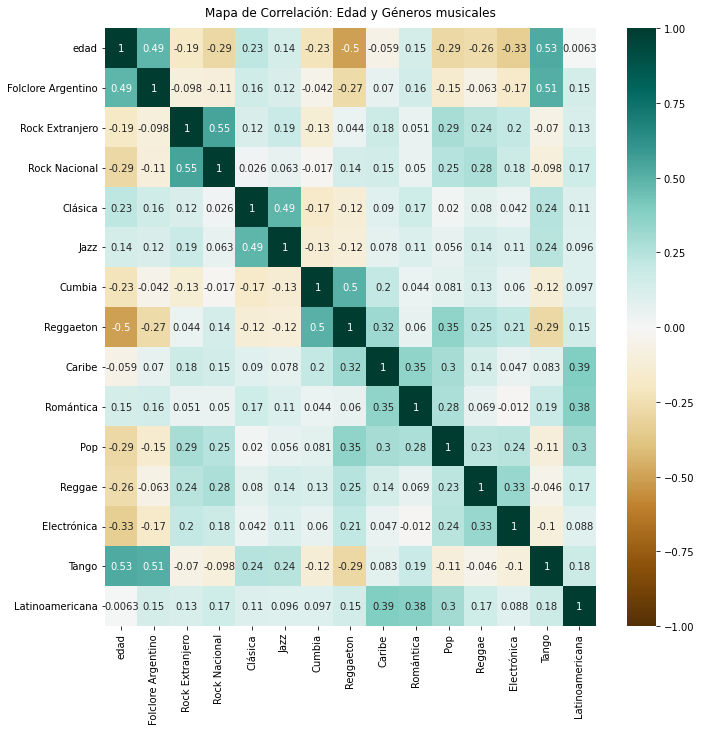

In [16]:
plt.figure(figsize=(11, 11))
sns.heatmap(dfCorr.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG').set_title('Mapa de Correlación: Edad y Géneros musicales', fontdict={'fontsize':12}, pad=12);

- Se puede ver que los géneros tango, folcklore argentino y clásica tienen una interesante correlación positiva con la variable edad, mientras que el reggaeton, la electrónica, el rock nacional y el pop poseen una correlación negativa con la variable mencionada.

- Genero grupos etarios.

In [17]:
bins= [13,23,33,43,53,63,73,83,100]
labels = ['13-22','23-32','33-42','43-52','53-62','63-72','73-82','83-92']
dfCorr['GrupoEtario'] = pd.cut(dfCorr['edad'], bins=bins, labels=labels, right=False)

In [18]:
dfCorr['GrupoEtario'].unique()

['13-22', '23-32', '53-62', '63-72', '33-42', '73-82', '43-52', '83-92']
Categories (8, object): ['13-22' < '23-32' < '33-42' < '43-52' < '53-62' < '63-72' < '73-82' < '83-92']

- Grafico la media para cada grupo etario con los géneros tango, folclore argentino y clásica. 

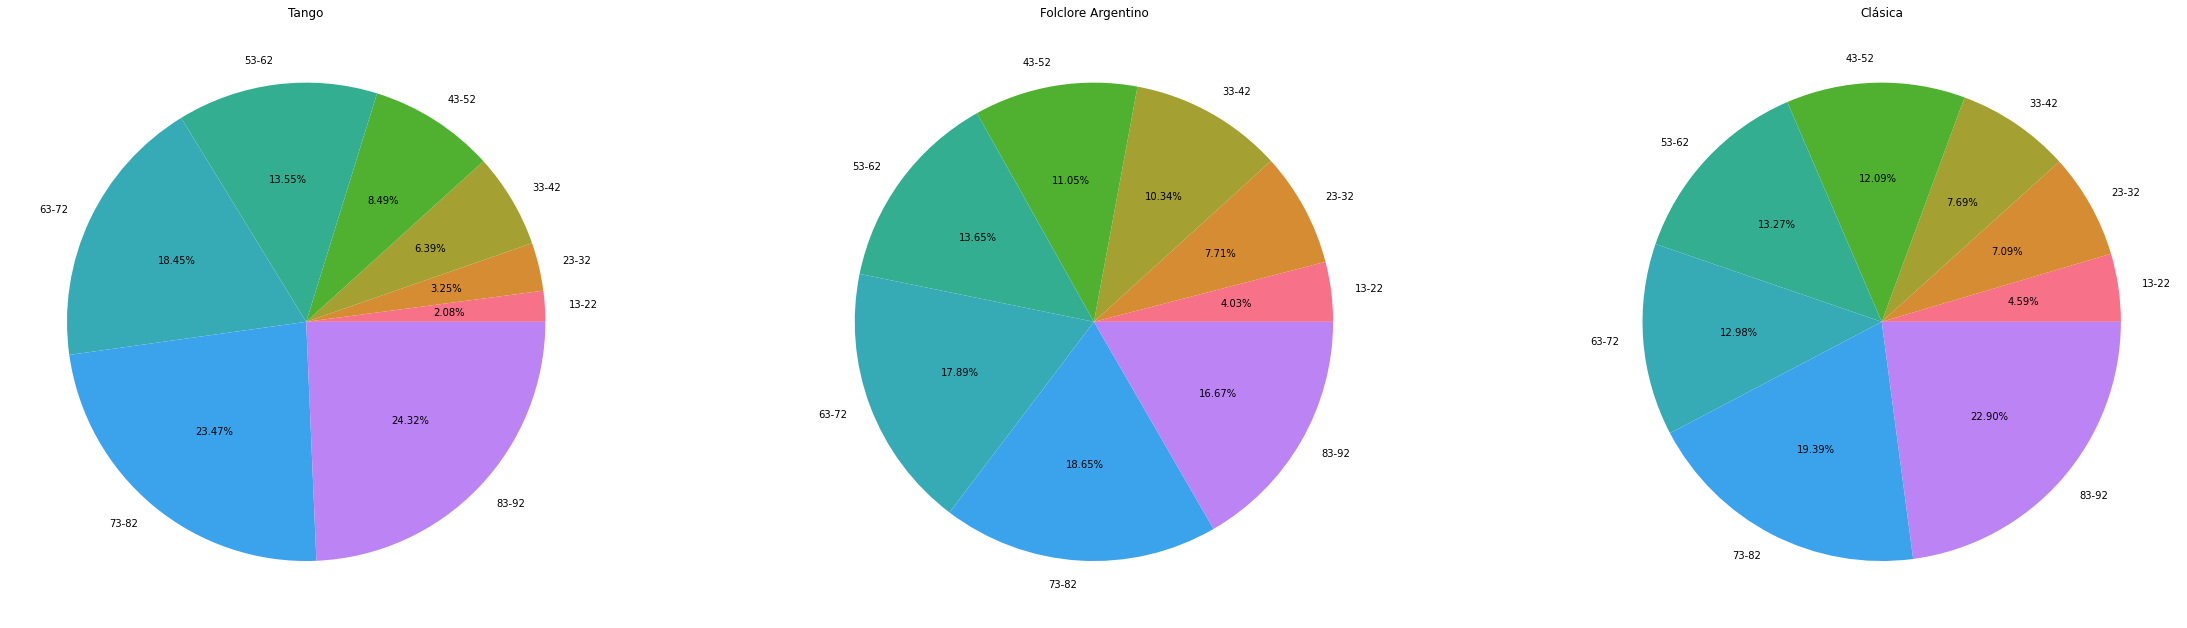

In [19]:
colors = sns.color_palette("husl", 9)



fig = plt.figure(figsize=(40,11))

#tango
ax = fig.add_subplot(131)
dfTango = dfCorr.groupby('GrupoEtario')['Tango'].agg(pd.Series.mean).reset_index()
ax.pie(dfTango['Tango'],labels=dfTango['GrupoEtario'],colors=colors,autopct='%0.2f%%')
ax.set_title('Tango')

#folclore argentino
ax = fig.add_subplot(132)
dfFolcArg = dfCorr.groupby('GrupoEtario')['Folclore Argentino'].agg(pd.Series.mean).reset_index()
ax.pie(dfFolcArg['Folclore Argentino'],labels=dfFolcArg['GrupoEtario'],colors=colors,autopct='%0.2f%%');
ax.set_title('Folclore Argentino')

#clásica
ax = fig.add_subplot(133)
dfClasica = dfCorr.groupby('GrupoEtario')['Clásica'].agg(pd.Series.mean).reset_index()
ax.pie(dfClasica['Clásica'],labels=dfClasica['GrupoEtario'],colors=colors,autopct='%0.2f%%');
ax.set_title('Clásica');


- Grafico las medias de grupos etarios para los géneros reggaeton, electrónica y rock nacional.

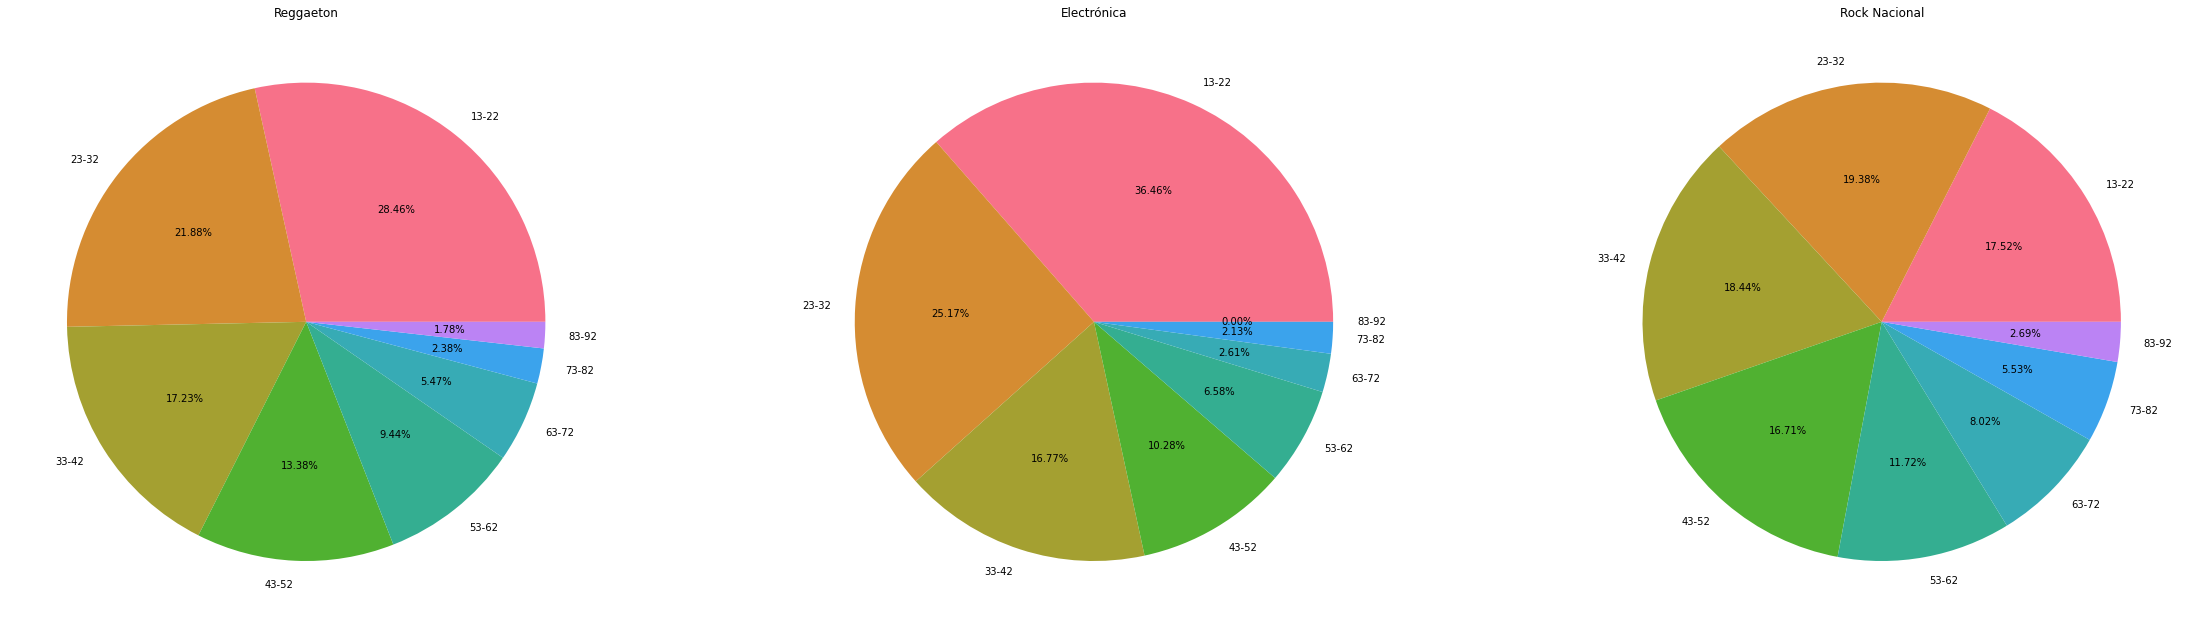

In [20]:
fig = plt.figure(figsize=(40,11))

#reggaeton
ax = fig.add_subplot(131)
dfRegg = dfCorr.groupby('GrupoEtario')['Reggaeton'].agg(pd.Series.mean).reset_index()
ax.pie(dfRegg['Reggaeton'],labels=dfRegg['GrupoEtario'],colors=colors,autopct='%0.2f%%')
ax.set_title('Reggaeton')

#electrónica
ax = fig.add_subplot(132)
dfElec = dfCorr.groupby('GrupoEtario')['Electrónica'].agg(pd.Series.mean).reset_index()
ax.pie(dfElec['Electrónica'],labels=dfElec['GrupoEtario'],colors=colors,autopct='%0.2f%%');
ax.set_title('Electrónica')

#rock nacional
ax = fig.add_subplot(133)
dfRockNac = dfCorr.groupby('GrupoEtario')['Rock Nacional'].agg(pd.Series.mean).reset_index()
ax.pie(dfRockNac['Rock Nacional'],labels=dfClasica['GrupoEtario'],colors=colors,autopct='%0.2f%%');
ax.set_title('Rock Nacional');

- Grafico mi grupo etario (43-52) y los distintos géneros musicales

In [21]:
df4352Aux = dfCorr.loc[dfCorr['GrupoEtario'] == '43-52',['Folclore Argentino','Rock Extranjero','Rock Nacional','Clásica','Jazz','Cumbia','Reggaeton','Caribe','Romántica','Pop','Reggae','Electrónica','Tango','Latinoamericana']]
df4352Aux1 = df4352Aux.sum(numeric_only=True,axis=0)
df4352Aux1

Folclore Argentino    490
Rock Extranjero       413
Rock Nacional         565
Clásica               198
Jazz                  151
Cumbia                437
Reggaeton             342
Caribe                330
Romántica             518
Pop                   409
Reggae                150
Electrónica            90
Tango                 262
Latinoamericana       389
dtype: int64

In [22]:
type(df4352Aux1)

pandas.core.series.Series

In [23]:
df4352 = pd.DataFrame(df4352Aux1).reset_index()

In [24]:
df4352.columns = ['Genero','Total']

In [25]:
df4352

,Genero,Total
0,Folclore Argentino,490
1,Rock Extranjero,413
2,Rock Nacional,565
3,Clásica,198
4,Jazz,151
5,Cumbia,437
6,Reggaeton,342
7,Caribe,330
8,Romántica,518
9,Pop,409


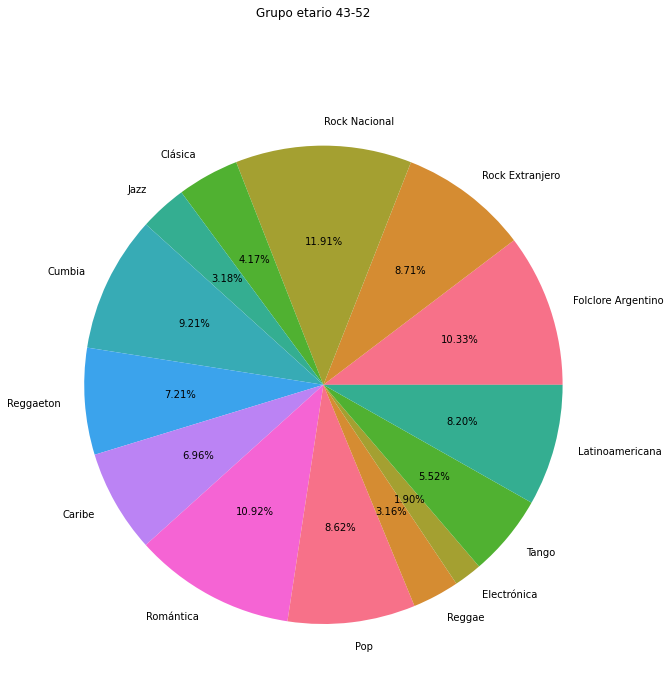

In [26]:
fig1 = plt.figure(figsize=(11,11))
plt.pie(df4352['Total'],labels=df4352['Genero'],colors=colors,autopct='%0.2f%%')
plt.suptitle('Grupo etario 43-52');

#ax = fig.add_subplot(132)
#dfElec = dfCorr.groupby('GrupoEtario')['Electrónica'].agg(pd.Series.mean).reset_index()
#ax.pie(dfElec['Electrónica'],labels=dfElec['GrupoEtario'],colors=colors,autopct='%0.2f%%');
#ax.set_title('Electrónica');

- Grafico y comparo mi grupo etario con los grupos etarios mínimo (13-22) y máximo (83-92)

In [27]:
df3Grupos = dfCorr.loc[((dfCorr['GrupoEtario'] == '13-22') | (dfCorr['GrupoEtario'] == '43-52') | (dfCorr['GrupoEtario'] == '83-92')),['GrupoEtario','Folclore Argentino','Rock Extranjero','Rock Nacional','Clásica','Jazz','Cumbia','Reggaeton','Caribe','Romántica','Pop','Reggae','Electrónica','Tango','Latinoamericana']]
df3Grupos.set_index('GrupoEtario')
df3Grupos

,GrupoEtario,Folclore Argentino,Rock Extranjero,Rock Nacional,Clásica,Jazz,Cumbia,Reggaeton,Caribe,Romántica,Pop,Reggae,Electrónica,Tango,Latinoamericana
0,13-22,0,0,3,0,0,2,2,0,0,0,2,2,0,0
5,13-22,0,0,2,0,0,3,3,0,2,3,0,0,0,0
10,13-22,0,2,2,0,0,3,3,0,0,0,3,2,0,2
14,13-22,0,2,3,0,0,2,2,0,2,2,2,0,2,3
23,13-22,0,0,0,0,0,1,2,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,13-22,0,0,2,0,0,3,3,3,3,3,2,3,0,0
2794,43-52,3,0,0,0,0,0,0,0,0,0,0,0,3,0
2796,13-22,1,0,0,0,1,2,3,2,1,3,1,2,0,3
2797,13-22,0,2,3,0,0,2,2,2,2,2,0,3,0,0


In [28]:
df3Grupos['GrupoEtario'].unique()

['13-22', '43-52', '83-92']
Categories (8, object): ['13-22' < '23-32' < '33-42' < '43-52' < '53-62' < '63-72' < '73-82' < '83-92']

In [29]:
#groupby('GrupoEtario').agg( {  'GrupoEtario':'mean', 'Folclore Argentino':'mean', 'Rock Extranjero':'mean',
#     'Rock Nacional':'mean',
#     'Clásica':'mean',
#     'Jazz':'mean',
#     'Cumbia':'mean',
#     'Reggaeton':'mean',
##     'Caribe':'mean',
#     'Romántica':'mean',
#     'Pop':'mean',
#     'Reggae':'mean',
#     'Electrónica':'mean',
#     'Tango':'mean',
#     'Latinoamericana':'mean'        
#    }
#).reset_index()
df3Grupos1 = df3Grupos.melt(id_vars=["GrupoEtario"])
df3Grupos1

,GrupoEtario,variable,value
0,13-22,Folclore Argentino,0
1,13-22,Folclore Argentino,0
2,13-22,Folclore Argentino,0
3,13-22,Folclore Argentino,0
4,13-22,Folclore Argentino,0
...,...,...,...
15465,13-22,Latinoamericana,0
15466,43-52,Latinoamericana,0
15467,13-22,Latinoamericana,3
15468,13-22,Latinoamericana,0


In [30]:
df3Grupos2 = df3Grupos1.groupby(['GrupoEtario','variable'])['value'].agg(pd.Series.mean).reset_index()
df3Grupos2

,GrupoEtario,variable,value
0,13-22,Caribe,0.847411
1,13-22,Clásica,0.220708
2,13-22,Cumbia,1.702997
3,13-22,Electrónica,0.935967
4,13-22,Folclore Argentino,0.524523
...,...,...,...
107,83-92,Reggaeton,0.133333
108,83-92,Rock Extranjero,0.066667
109,83-92,Rock Nacional,0.266667
110,83-92,Romántica,0.933333


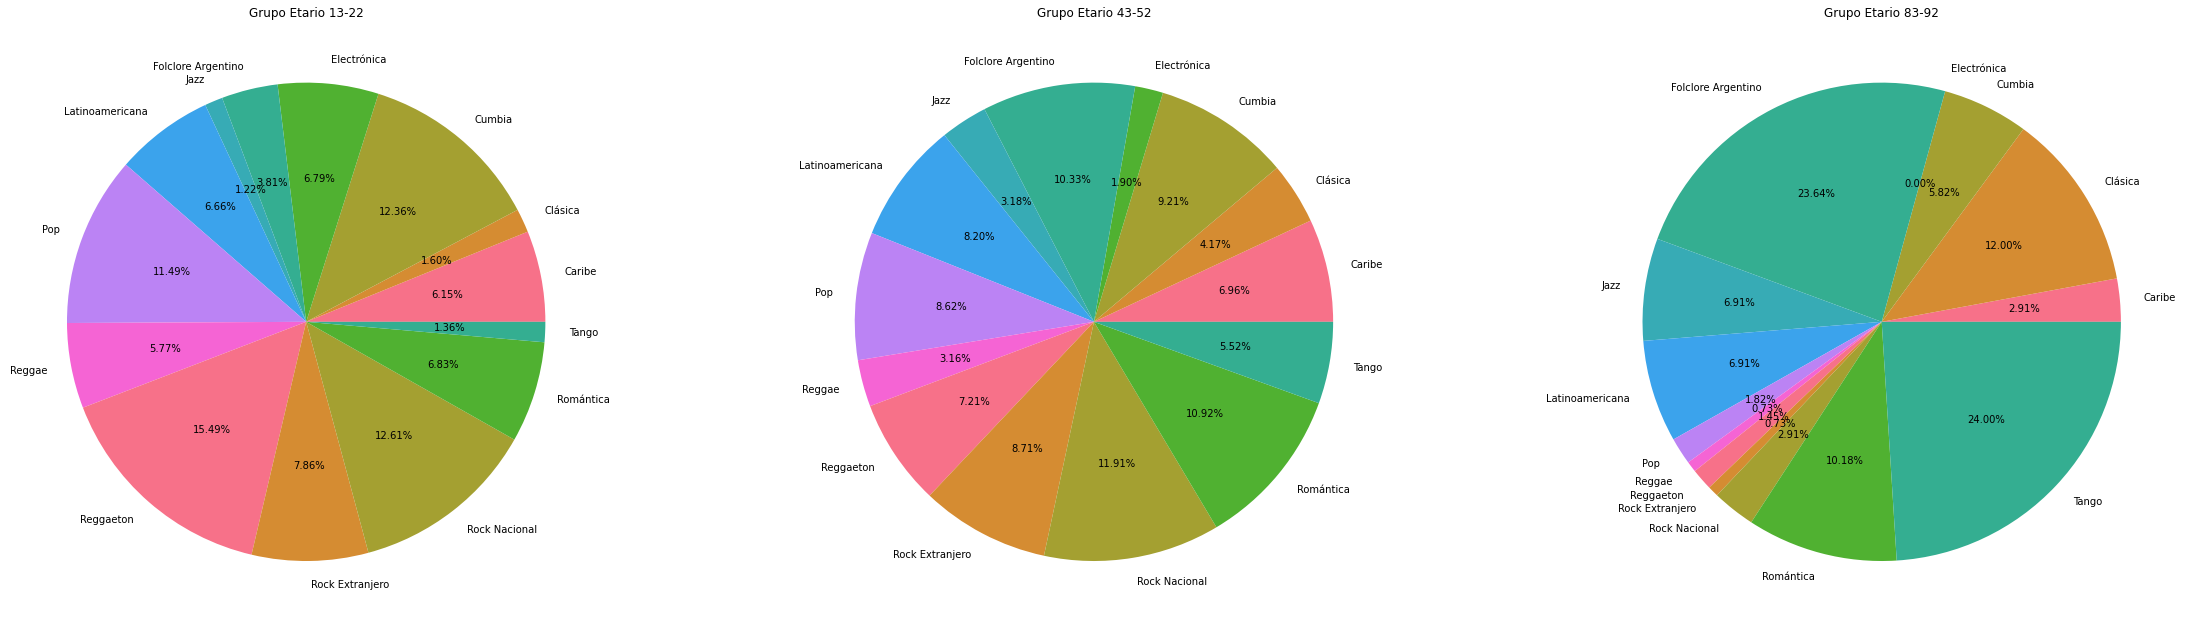

In [31]:
fig = plt.figure(figsize=(40,11))

#13-22
ax = fig.add_subplot(131)
df1322 = df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '13-22'].reset_index()
ax.pie(df1322['value'],labels=df1322['variable'],colors=colors,autopct='%0.2f%%')
ax.set_title('Grupo Etario 13-22')

#43-52
ax = fig.add_subplot(132)
df4352 = df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '43-52'].reset_index()
ax.pie(df4352['value'],labels=df4352['variable'],colors=colors,autopct='%0.2f%%')
ax.set_title('Grupo Etario 43-52')

#83-92
ax = fig.add_subplot(133)
df8392 = df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '83-92'].reset_index()
ax.pie(df8392['value'],labels=df8392['variable'],colors=colors,autopct='%0.2f%%')
ax.set_title('Grupo Etario 83-92');

- Otro tipo de gráfico

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '13-22']['variable'], 
    y=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '13-22']['value'],
    mode='lines+markers',
    name='13-22',
    marker_color='lime',
))
fig.add_trace(go.Scatter( 
    x=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '43-52']['variable'], 
    y=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '43-52']['value'],
    mode='lines+markers',
    name='43-52',
    marker_color='cornflowerblue',
))
fig.add_trace(go.Scatter( 
    x=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '83-92']['variable'], 
    y=df3Grupos2.loc[df3Grupos2['GrupoEtario'] == '83-92']['value'],
    mode='lines+markers',
    name='83-92',
    marker_color='crimson',
))


fig.show()

In [33]:
df[['region','p104','p106','p108','p109','p110','p114','p116','p117']].head()

,region,p104,p106,p108,p109,p110,p114,p116,p117
0,CENTRO,6.0,SECUNDARIA INCOMPLETA,SECUNDARIA COMPLETA,TRABAJA,EMPLEADO,PROPIA,BARRIO DE VIVIENDA SOCIAL,CASA
1,CENTRO,1.0,SECUNDARIA COMPLETA,NaN,TRABAJA,ATENCION AL PUBLICO,PRESTADA,BARRIO DE VIVIENDA SOCIAL,DEPARTAMENTO
2,CENTRO,3.0,UNIVERSITARIO INCOMPLETO,NaN,TRABAJA,PROFESIONAL,PRESTADA,BARRIO DE VIVIENDA SOCIAL,CASA
3,CENTRO,5.0,TERCIARIO INCOMPLETO,NaN,TRABAJA,EMPLEADO,PROPIA,BARRIO DE VIVIENDA SOCIAL,CASA
4,CENTRO,3.0,SECUNDARIA COMPLETA,NaN,ES JUBILADO/PENSIONADO,,PROPIA,BARRIO DE VIVIENDA SOCIAL,CASA


- Trabajo con la relación entre nivel educativo y géneros musicales

In [34]:
dfEduc = df[['p106','p14_1','p14_2','p14_3','p14_4','p14_5','p14_6','p14_7','p14_8','p14_9','p14_10','p14_11','p14_12','p14_13','p14_14']]

In [35]:
dfEduc['p106'].unique()

array(['SECUNDARIA INCOMPLETA', 'SECUNDARIA COMPLETA',
       'UNIVERSITARIO INCOMPLETO', 'TERCIARIO INCOMPLETO',
       'TERCIARIO COMPLETO', 'PRIMARIA COMPLETA', 'PRIMARIA INCOMPLETA',
       'UNIVERSITARIO COMPLETO', 'POSGRADO INCOMPLETO O COMPLETO',
       'SIN ESTUDIOS', nan], dtype=object)

In [36]:
dfEduc.shape

(2802, 15)

In [37]:
dfEduc.dropna(how='any',inplace=True)

In [38]:
dfEduc['p14_1'] = dfEduc['p14_1'].map(valores)
dfEduc['p14_2'] = dfEduc['p14_2'].map(valores)
dfEduc['p14_3'] = dfEduc['p14_3'].map(valores)
dfEduc['p14_4'] = dfEduc['p14_4'].map(valores)
dfEduc['p14_5'] = dfEduc['p14_5'].map(valores)
dfEduc['p14_6'] = dfEduc['p14_6'].map(valores)
dfEduc['p14_7'] = dfEduc['p14_7'].map(valores)
dfEduc['p14_8'] = dfEduc['p14_8'].map(valores)
dfEduc['p14_9'] = dfEduc['p14_9'].map(valores)
dfEduc['p14_10'] = dfEduc['p14_10'].map(valores)
dfEduc['p14_11'] = dfEduc['p14_11'].map(valores)
dfEduc['p14_12'] = dfEduc['p14_12'].map(valores)
dfEduc['p14_13'] = dfEduc['p14_13'].map(valores)
dfEduc['p14_14'] = dfEduc['p14_14'].map(valores)

In [39]:
dfEduc.rename(columns={
'p106':'Educación',
'p14_1':'Folclore Argentino',
'p14_2':'Rock Extranjero',
'p14_3':'Rock Nacional',
'p14_4':'Clásica',
'p14_5':'Jazz',
'p14_6':'Cumbia',
'p14_7':'Reggaeton',
'p14_8':'Caribe',
'p14_9':'Romántica',
'p14_10':'Pop',
'p14_11':'Reggae',
'p14_12':'Electrónica',
'p14_13':'Tango',
'p14_14':'Latinoamericana'
}, inplace=True)

In [40]:
dfEduc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2801
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Educación           2581 non-null   object
 1   Folclore Argentino  2581 non-null   int64 
 2   Rock Extranjero     2581 non-null   int64 
 3   Rock Nacional       2581 non-null   int64 
 4   Clásica             2581 non-null   int64 
 5   Jazz                2581 non-null   int64 
 6   Cumbia              2581 non-null   int64 
 7   Reggaeton           2581 non-null   int64 
 8   Caribe              2581 non-null   int64 
 9   Romántica           2581 non-null   int64 
 10  Pop                 2581 non-null   int64 
 11  Reggae              2581 non-null   int64 
 12  Electrónica         2581 non-null   int64 
 13  Tango               2581 non-null   int64 
 14  Latinoamericana     2581 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 322.6+ KB


In [41]:
dfEduc1 = dfEduc.melt(id_vars=["Educación"])
dfEduc1

,Educación,variable,value
0,SECUNDARIA INCOMPLETA,Folclore Argentino,0
1,SECUNDARIA COMPLETA,Folclore Argentino,3
2,UNIVERSITARIO INCOMPLETO,Folclore Argentino,0
3,TERCIARIO INCOMPLETO,Folclore Argentino,2
4,SECUNDARIA COMPLETA,Folclore Argentino,2
...,...,...,...
36129,TERCIARIO INCOMPLETO,Latinoamericana,0
36130,TERCIARIO INCOMPLETO,Latinoamericana,0
36131,SECUNDARIA COMPLETA,Latinoamericana,1
36132,SECUNDARIA COMPLETA,Latinoamericana,0


In [42]:
dfEduc2 = dfEduc1.groupby(['Educación','variable'])['value'].agg(pd.Series.mean).reset_index()
dfEduc2

,Educación,variable,value
0,POSGRADO INCOMPLETO O COMPLETO,Caribe,0.666667
1,POSGRADO INCOMPLETO O COMPLETO,Clásica,1.777778
2,POSGRADO INCOMPLETO O COMPLETO,Cumbia,0.277778
3,POSGRADO INCOMPLETO O COMPLETO,Electrónica,0.277778
4,POSGRADO INCOMPLETO O COMPLETO,Folclore Argentino,1.055556
...,...,...,...
135,UNIVERSITARIO INCOMPLETO,Reggaeton,1.235772
136,UNIVERSITARIO INCOMPLETO,Rock Extranjero,1.556911
137,UNIVERSITARIO INCOMPLETO,Rock Nacional,2.130081
138,UNIVERSITARIO INCOMPLETO,Romántica,1.065041


In [43]:
#este se va, queda el de abajo
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'SECUNDARIA INCOMPLETA']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'SECUNDARIA INCOMPLETA']['value'],
    mode='lines+markers',
    name='SECUNDARIA INCOMPLETA',
    marker_color='lime',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'SECUNDARIA COMPLETA']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'SECUNDARIA COMPLETA']['value'],
    mode='lines+markers',
    name='SECUNDARIA COMPLETA',
    marker_color='cornflowerblue',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'UNIVERSITARIO INCOMPLETO']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'UNIVERSITARIO INCOMPLETO']['value'],
    mode='lines+markers',
    name='UNIVERSITARIO INCOMPLETO',
    marker_color='crimson',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'TERCIARIO COMPLETO']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'TERCIARIO COMPLETO']['value'],
    mode='lines+markers',
    name='TERCIARIO COMPLETO',
    marker_color='springgreen',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'TERCIARIO INCOMPLETO']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'TERCIARIO INCOMPLETO']['value'],
    mode='lines+markers',
    name='TERCIARIO INCOMPLETO',
    marker_color='goldenrod',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'PRIMARIA COMPLETA']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'PRIMARIA COMPLETA']['value'],
    mode='lines+markers',
    name='PRIMARIA COMPLETA',
    marker_color='deeppink',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'PRIMARIA INCOMPLETA']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'PRIMARIA INCOMPLETA']['value'],
    mode='lines+markers',
    name='PRIMARIA INCOMPLETA',
    marker_color='slateblue',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'UNIVERSITARIO COMPLETO']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'UNIVERSITARIO COMPLETO']['value'],
    mode='lines+markers',
    name='UNIVERSITARIO COMPLETO',
    marker_color='gold',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'POSGRADO INCOMPLETO O COMPLETO']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'POSGRADO INCOMPLETO O COMPLETO']['value'],
    mode='lines+markers',
    name='POSGRADO INCOMPLETO O COMPLETO',
    marker_color='orchid',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['Educación'] == 'SIN ESTUDIOS']['variable'], 
    y=dfEduc2.loc[dfEduc2['Educación'] == 'SIN ESTUDIOS']['value'],
    mode='lines+markers',
    name='SIN ESTUDIOS',
    marker_color='darkorange',
))
fig.show();

In [44]:
fig = px.histogram(dfEduc2, x="variable", y="value",
             color='Educación', barmode='group',
             height=400,
             color_discrete_sequence=px.colors.qualitative.Dark24,
             labels={
                     "variable": "Género",
                     "sum of value": "Valor"
                 })
fig.show()

- Grafico desde otra óptica

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Folclore Argentino']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Folclore Argentino']['value'],
    mode='lines+markers',
    name='Folclore Argentino',
    marker_color='lime',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Rock Extranjero']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Rock Extranjero']['value'],
    mode='lines+markers',
    name='Rock Extranjero',
    marker_color='cornflowerblue',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Rock Nacional']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Rock Nacional']['value'],
    mode='lines+markers',
    name='Rock Nacional',
    marker_color='crimson',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Clásica']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Clásica']['value'],
    mode='lines+markers',
    name='Clásica',
    marker_color='springgreen',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Jazz']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Jazz']['value'],
    mode='lines+markers',
    name='Jazz',
    marker_color='goldenrod',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Cumbia']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Cumbia']['value'],
    mode='lines+markers',
    name='Cumbia',
    marker_color='deeppink',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Reggaeton']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Reggaeton']['value'],
    mode='lines+markers',
    name='Reggaeton',
    marker_color='slateblue',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Caribe']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Caribe']['value'],
    mode='lines+markers',
    name='Caribe',
    marker_color='sienna',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Romántica']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Romántica']['value'],
    mode='lines+markers',
    name='Romántica',
    marker_color='orchid',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Pop']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Pop']['value'],
    mode='lines+markers',
    name='Pop',
    marker_color='darkorange',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Reggae']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Reggae']['value'],
    mode='lines+markers',
    name='Reggae',
    marker_color='darkolivegreen',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Electrónica']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Electrónica']['value'],
    mode='lines+markers',
    name='Electrónica',
    marker_color='darkcyan',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Tango']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Tango']['value'],
    mode='lines+markers',
    name='Tango',
    marker_color='darksalmon',
))
fig.add_trace(go.Scatter( 
    x=dfEduc2.loc[dfEduc2['variable'] == 'Latinoamericana']['Educación'], 
    y=dfEduc2.loc[dfEduc2['variable'] == 'Latinoamericana']['value'],
    mode='lines+markers',
    name='Latinoamericana',
    marker_color='lightpink',
))
fig.show()

- Trabajo con el tipo de vivienda en relación a los géneros musicales

In [46]:
dfUbicVivienda = df[['p116','p14_1','p14_2','p14_3','p14_4','p14_5','p14_6','p14_7','p14_8','p14_9','p14_10','p14_11','p14_12','p14_13','p14_14']]

In [47]:
dfUbicVivienda.dropna(how='any',inplace=True)

In [48]:
dfUbicVivienda['p116'].unique()

array(['BARRIO DE VIVIENDA SOCIAL', 'BARRIO CON VIVIENDAS DISTINTAS',
       'ASENTAMIENTO', 'BARRIO CENTRICO CON PREDOMINIO DE CASAS',
       'BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE DEPARTAMENTO',
       'VILLA DE EMERGENCIA'], dtype=object)

In [49]:
dfUbicVivienda['p14_1'] = dfUbicVivienda['p14_1'].map(valores)
dfUbicVivienda['p14_2'] = dfUbicVivienda['p14_2'].map(valores)
dfUbicVivienda['p14_3'] = dfUbicVivienda['p14_3'].map(valores)
dfUbicVivienda['p14_4'] = dfUbicVivienda['p14_4'].map(valores)
dfUbicVivienda['p14_5'] = dfUbicVivienda['p14_5'].map(valores)
dfUbicVivienda['p14_6'] = dfUbicVivienda['p14_6'].map(valores)
dfUbicVivienda['p14_7'] = dfUbicVivienda['p14_7'].map(valores)
dfUbicVivienda['p14_8'] = dfUbicVivienda['p14_8'].map(valores)
dfUbicVivienda['p14_9'] = dfUbicVivienda['p14_9'].map(valores)
dfUbicVivienda['p14_10'] = dfUbicVivienda['p14_10'].map(valores)
dfUbicVivienda['p14_11'] = dfUbicVivienda['p14_11'].map(valores)
dfUbicVivienda['p14_12'] = dfUbicVivienda['p14_12'].map(valores)
dfUbicVivienda['p14_13'] = dfUbicVivienda['p14_13'].map(valores)
dfUbicVivienda['p14_14'] = dfUbicVivienda['p14_14'].map(valores)

In [50]:
dfUbicVivienda.rename(columns={
'p116':'Ubic_vivienda',
'p14_1':'Folclore Argentino',
'p14_2':'Rock Extranjero',
'p14_3':'Rock Nacional',
'p14_4':'Clásica',
'p14_5':'Jazz',
'p14_6':'Cumbia',
'p14_7':'Reggaeton',
'p14_8':'Caribe',
'p14_9':'Romántica',
'p14_10':'Pop',
'p14_11':'Reggae',
'p14_12':'Electrónica',
'p14_13':'Tango',
'p14_14':'Latinoamericana'
}, inplace=True)

In [51]:
dfUbicVivienda

,Ubic_vivienda,Folclore Argentino,Rock Extranjero,Rock Nacional,Clásica,Jazz,Cumbia,Reggaeton,Caribe,Romántica,Pop,Reggae,Electrónica,Tango,Latinoamericana
0,BARRIO DE VIVIENDA SOCIAL,0,0,3,0,0,2,2,0,0,0,2,2,0,0
1,BARRIO DE VIVIENDA SOCIAL,3,1,3,0,0,2,2,1,1,0,2,0,0,0
2,BARRIO DE VIVIENDA SOCIAL,0,0,3,1,2,3,3,0,0,0,0,0,1,0
3,BARRIO DE VIVIENDA SOCIAL,2,0,3,0,0,2,0,0,2,0,0,0,2,0
4,BARRIO DE VIVIENDA SOCIAL,2,0,0,0,0,2,0,0,3,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,0,2,3,0,0,2,2,2,2,2,0,3,0,0
2798,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,0,0,2,0,0,3,3,3,3,3,2,0,0,0
2799,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2800,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,0,0,0,3,3,0,0,0,3,0,0,0,3,0


In [52]:
dfUbicVivienda1 = dfUbicVivienda.melt(id_vars=["Ubic_vivienda"])
dfUbicVivienda1

,Ubic_vivienda,variable,value
0,BARRIO DE VIVIENDA SOCIAL,Folclore Argentino,0
1,BARRIO DE VIVIENDA SOCIAL,Folclore Argentino,3
2,BARRIO DE VIVIENDA SOCIAL,Folclore Argentino,0
3,BARRIO DE VIVIENDA SOCIAL,Folclore Argentino,2
4,BARRIO DE VIVIENDA SOCIAL,Folclore Argentino,2
...,...,...,...
36101,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,Latinoamericana,0
36102,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,Latinoamericana,0
36103,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,Latinoamericana,1
36104,BARRIO CENTRICO CON PREDOMINIO DE EDIFICIOS DE...,Latinoamericana,0


In [53]:
dfUbicVivienda2 = dfUbicVivienda1.groupby(['Ubic_vivienda','variable'])['value'].agg(pd.Series.mean).reset_index()
dfUbicVivienda2

,Ubic_vivienda,variable,value
0,ASENTAMIENTO,Caribe,1.120000
1,ASENTAMIENTO,Clásica,0.200000
2,ASENTAMIENTO,Cumbia,2.240000
3,ASENTAMIENTO,Electrónica,0.440000
4,ASENTAMIENTO,Folclore Argentino,1.560000
...,...,...,...
79,VILLA DE EMERGENCIA,Reggaeton,1.177778
80,VILLA DE EMERGENCIA,Rock Extranjero,0.755556
81,VILLA DE EMERGENCIA,Rock Nacional,1.111111
82,VILLA DE EMERGENCIA,Romántica,1.688889


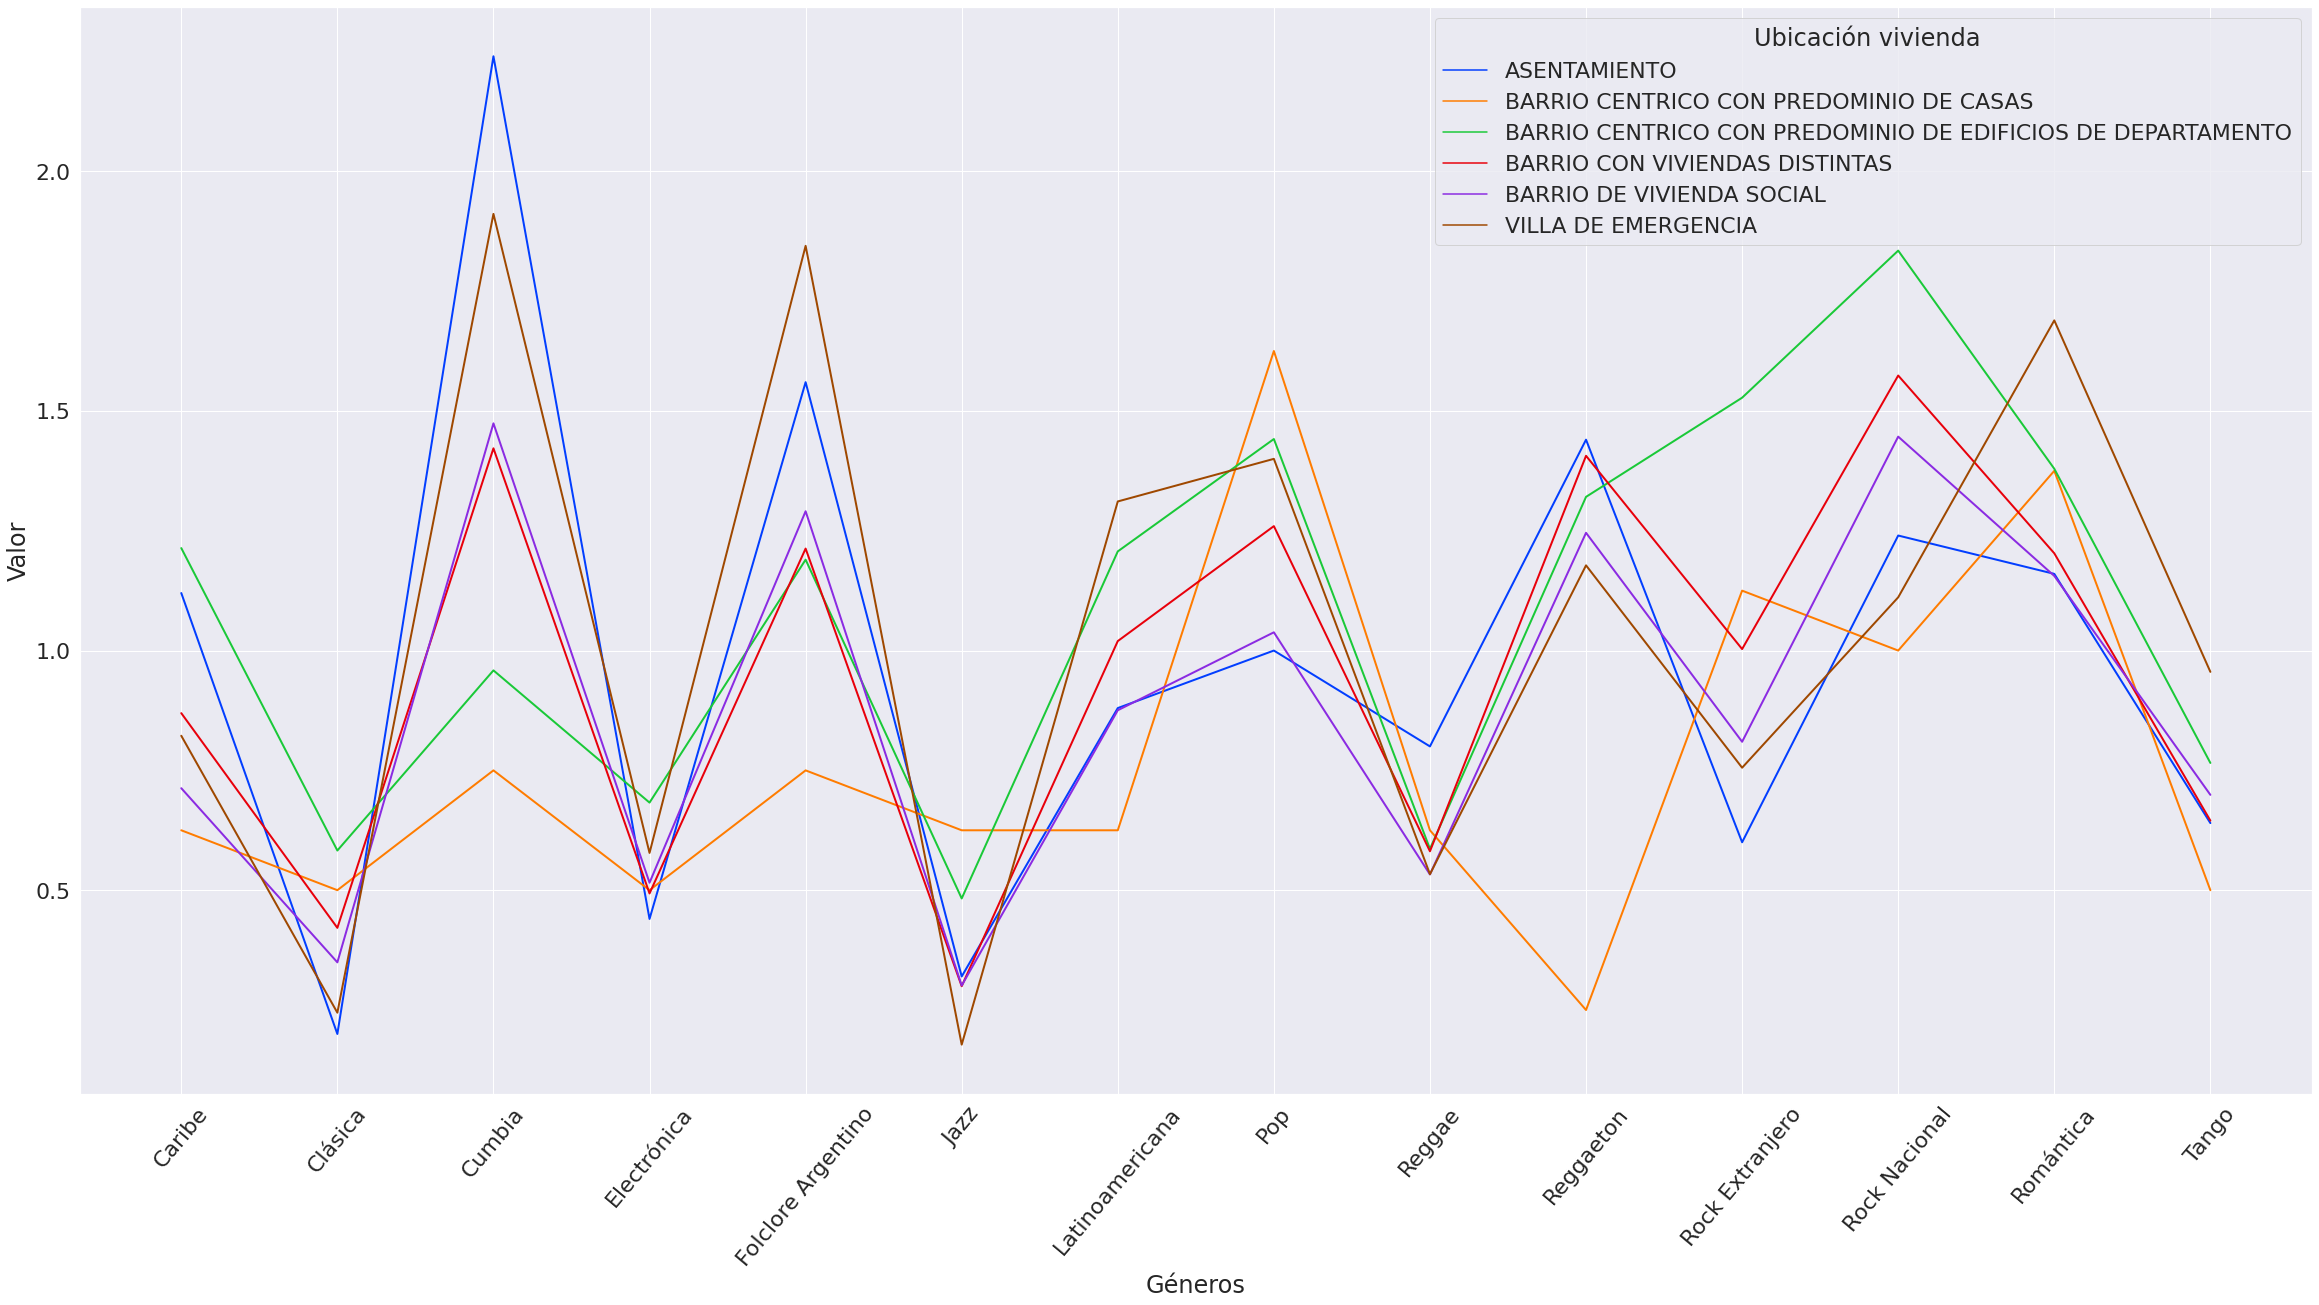

In [54]:
fig = plt.figure(figsize=(40,20))
sns.set(font_scale=2)
ax = sns.lineplot(x = "variable",
             y = "value",
             palette='bright',
             hue = "Ubic_vivienda",
             data = dfUbicVivienda2,
             linewidth = 2,
             markers=True)
ax.set(xlabel ="Géneros", ylabel = "Valor")
ax.tick_params(axis='x', rotation=50)
plt.legend(title='Ubicación vivienda');

- Trabajo con las regiones del país

In [55]:
dfRegiones = df[['region','p14_1','p14_2','p14_3','p14_4','p14_5','p14_6','p14_7','p14_8','p14_9','p14_10','p14_11','p14_12','p14_13','p14_14']]

In [56]:
dfRegiones['region'].unique()

array(['CENTRO', 'NEA', 'PATAGONIA', 'NOA', 'CUYO', 'CABA', 'PBA', nan],
      dtype=object)

In [57]:
dfRegiones.shape

(2802, 15)

In [58]:
dfRegiones.dropna(how='any',inplace=True)

In [59]:
dfRegiones['p14_1'] = dfRegiones['p14_1'].map(valores)
dfRegiones['p14_2'] = dfRegiones['p14_2'].map(valores)
dfRegiones['p14_3'] = dfRegiones['p14_3'].map(valores)
dfRegiones['p14_4'] = dfRegiones['p14_4'].map(valores)
dfRegiones['p14_5'] = dfRegiones['p14_5'].map(valores)
dfRegiones['p14_6'] = dfRegiones['p14_6'].map(valores)
dfRegiones['p14_7'] = dfRegiones['p14_7'].map(valores)
dfRegiones['p14_8'] = dfRegiones['p14_8'].map(valores)
dfRegiones['p14_9'] = dfRegiones['p14_9'].map(valores)
dfRegiones['p14_10'] = dfRegiones['p14_10'].map(valores)
dfRegiones['p14_11'] = dfRegiones['p14_11'].map(valores)
dfRegiones['p14_12'] = dfRegiones['p14_12'].map(valores)
dfRegiones['p14_13'] = dfRegiones['p14_13'].map(valores)
dfRegiones['p14_14'] = dfRegiones['p14_14'].map(valores)

In [60]:
dfRegiones.rename(columns={
'p14_1':'Folclore Argentino',
'p14_2':'Rock Extranjero',
'p14_3':'Rock Nacional',
'p14_4':'Clásica',
'p14_5':'Jazz',
'p14_6':'Cumbia',
'p14_7':'Reggaeton',
'p14_8':'Caribe',
'p14_9':'Romántica',
'p14_10':'Pop',
'p14_11':'Reggae',
'p14_12':'Electrónica',
'p14_13':'Tango',
'p14_14':'Latinoamericana'
}, inplace=True)

In [61]:
dfRegiones

,region,Folclore Argentino,Rock Extranjero,Rock Nacional,Clásica,Jazz,Cumbia,Reggaeton,Caribe,Romántica,Pop,Reggae,Electrónica,Tango,Latinoamericana
0,CENTRO,0,0,3,0,0,2,2,0,0,0,2,2,0,0
1,CENTRO,3,1,3,0,0,2,2,1,1,0,2,0,0,0
2,CENTRO,0,0,3,1,2,3,3,0,0,0,0,0,1,0
3,CENTRO,2,0,3,0,0,2,0,0,2,0,0,0,2,0
4,CENTRO,2,0,0,0,0,2,0,0,3,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,CENTRO,0,2,3,0,0,2,2,2,2,2,0,3,0,0
2798,CENTRO,0,0,2,0,0,3,3,3,3,3,2,0,0,0
2799,CENTRO,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2800,CENTRO,0,0,0,3,3,0,0,0,3,0,0,0,3,0


In [62]:
dfRegiones1 = dfRegiones.melt(id_vars=["region"])
dfRegiones1

,region,variable,value
0,CENTRO,Folclore Argentino,0
1,CENTRO,Folclore Argentino,3
2,CENTRO,Folclore Argentino,0
3,CENTRO,Folclore Argentino,2
4,CENTRO,Folclore Argentino,2
...,...,...,...
36129,CENTRO,Latinoamericana,0
36130,CENTRO,Latinoamericana,0
36131,CENTRO,Latinoamericana,1
36132,CENTRO,Latinoamericana,0


In [63]:
dfRegiones2 = dfRegiones1.groupby(['region','variable'])['value'].agg(pd.Series.mean).reset_index()
dfRegiones2

,region,variable,value
0,CABA,Caribe,1.391892
1,CABA,Clásica,0.683784
2,CABA,Cumbia,0.864865
3,CABA,Electrónica,0.462162
4,CABA,Folclore Argentino,1.000000
...,...,...,...
93,PBA,Reggaeton,1.509186
94,PBA,Rock Extranjero,1.296588
95,PBA,Rock Nacional,1.887139
96,PBA,Romántica,1.086614


In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'CENTRO']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'CENTRO']['value'],
    mode='lines+markers',
    name='CENTRO',
    marker_color='lime',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'NOA']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'NOA']['value'],
    mode='lines+markers',
    name='NOA',
    marker_color='cornflowerblue',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'NEA']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'NEA']['value'],
    mode='lines+markers',
    name='NEA',
    marker_color='crimson',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'CABA']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'CABA']['value'],
    mode='lines+markers',
    name='CABA',
    marker_color='springgreen',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'PBA']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'PBA']['value'],
    mode='lines+markers',
    name='PBA',
    marker_color='tan',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'CUYO']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'CUYO']['value'],
    mode='lines+markers',
    name='CUYO',
    marker_color='violet',
))
fig.add_trace(go.Scatter( 
    x=dfRegiones2.loc[dfRegiones2['region'] == 'PATAGONIA']['variable'], 
    y=dfRegiones2.loc[dfRegiones2['region'] == 'PATAGONIA']['value'],
    mode='lines+markers',
    name='PATAGONIA',
    marker_color='olive',
))
fig.show();

- Ubico las regiones en un mapa

In [65]:
# Librerias necesarias para librerías de goepython
!apt install gdal-bin python-gdal python3-gdal 
# Instalamos rtree (requerimiento de Geopandas)
!apt install python3-rtree 
# Instalamos Geopandas desde el repositorio, para tomar la última versión
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (15.0 MB/s)
Selecting previously unselected 

In [66]:
import geopandas as gpd

In [67]:
gdf_prov = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase4/data/provincia.zip?raw=true')

In [68]:
gdf_prov.head(2)

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."


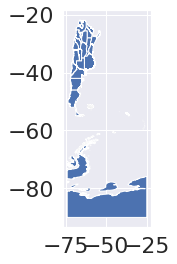

In [69]:
#fig,ax = plt.subplots(figsize=(30,18))
#gdf_prov.plot(ax=ax);
gdf_prov.plot();

In [70]:
#hago copia por las
gdfRegiones = gdf_prov

In [71]:
gdfRegiones.head(10)

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."
5,6,0.0,Provincia,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,7,0.0,Provincia,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,8,0.0,Provincia,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,9,0.0,Provincia,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,10,0.0,Provincia,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


In [72]:
gdfRegiones['nam'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Neuquén', 'San Luis',
       'Santa Fe', 'La Rioja', 'Catamarca', 'Tucumán', 'Chaco', 'Formosa',
       'Santa Cruz', 'Chubut', 'Mendoza', 'Córdoba', 'Entre Ríos',
       'San Juan', 'Jujuy', 'Santiago del Estero', 'Río Negro',
       'Corrientes', 'Misiones', 'Salta', 'La Pampa',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Buenos Aires'], dtype=object)

In [73]:
dfRegiones2['region'].unique()

array(['CABA', 'CENTRO', 'CUYO', 'NEA', 'NOA', 'PATAGONIA', 'PBA'],
      dtype=object)

In [74]:
#creo las regiones
#gdf_prov_1.loc[gdf_prov_1['nam'] == 'Ciudad Autónoma de Buenos Aires','region'] = 'CABA'
#gdf_prov_1.loc[gdf_prov_1['nam'] == 'Buenos Aires','region'] = 'PBA'
#gdf_prov_1.loc[(gdf_prov_1['nam'] == 'Mendoza') | (gdf_prov_1['nam'] == 'San Luis') | (gdf_prov_1['nam'] == 'San Juan') | (gdf_prov_1['nam'] == 'La Rioja'),'region'] = 'CUYO'
#gdf_prov_1.loc[(gdf_prov_1['nam'] == 'Chaco') | (gdf_prov_1['nam'] == 'Misiones') | (gdf_prov_1['nam'] == 'Corrientes') | (gdf_prov_1['nam'] == 'Formosa'),'region'] = 'NEA'
#gdf_prov_1.loc[(gdf_prov_1['nam'] == 'Catamarca') | (gdf_prov_1['nam'] == 'Jujuy') | (gdf_prov_1['nam'] == 'Tucumán') | (gdf_prov_1['nam'] == 'Salta') | (gdf_prov_1['nam'] == 'Santiago del Estero'),'region'] = 'NOA'
#gdf_prov_1.loc[(gdf_prov_1['nam'] == 'Neuquén') | (gdf_prov_1['nam'] == 'Río Negro') | (gdf_prov_1['nam'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur') | (gdf_prov_1['nam'] == 'Santa Cruz') | (gdf_prov_1['nam'] == 'Chubut'),'region'] = 'PATAGONIA'
#gdf_prov_1.loc[(gdf_prov_1['nam'] == 'Entre Ríos') | (gdf_prov_1['nam'] == 'La Pampa') | (gdf_prov_1['nam'] == 'Córdoba') | (gdf_prov_1['nam'] == 'Santa Fe'),'region'] = 'CENTRO'
gdfRegiones.loc[gdfRegiones['nam'] == 'Ciudad Autónoma de Buenos Aires','region'] = 'CABA'
gdfRegiones.loc[gdfRegiones['nam'] == 'Buenos Aires','region'] = 'PBA'
gdfRegiones.loc[(gdfRegiones['nam'] == 'Mendoza') | (gdfRegiones['nam'] == 'San Luis') | (gdfRegiones['nam'] == 'San Juan') | (gdfRegiones['nam'] == 'La Rioja'),'region'] = 'CUYO'
gdfRegiones.loc[(gdfRegiones['nam'] == 'Chaco') | (gdfRegiones['nam'] == 'Misiones') | (gdfRegiones['nam'] == 'Corrientes') | (gdfRegiones['nam'] == 'Formosa'),'region'] = 'NEA'
gdfRegiones.loc[(gdfRegiones['nam'] == 'Catamarca') | (gdfRegiones['nam'] == 'Jujuy') | (gdfRegiones['nam'] == 'Tucumán') | (gdfRegiones['nam'] == 'Salta') | (gdfRegiones['nam'] == 'Santiago del Estero'),'region'] = 'NOA'
gdfRegiones.loc[(gdfRegiones['nam'] == 'Neuquén') | (gdfRegiones['nam'] == 'Río Negro') | (gdfRegiones['nam'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur') | (gdfRegiones['nam'] == 'Santa Cruz') | (gdfRegiones['nam'] == 'Chubut'),'region'] = 'PATAGONIA'
gdfRegiones.loc[(gdfRegiones['nam'] == 'Entre Ríos') | (gdfRegiones['nam'] == 'La Pampa') | (gdfRegiones['nam'] == 'Córdoba') | (gdfRegiones['nam'] == 'Santa Fe'),'region'] = 'CENTRO'

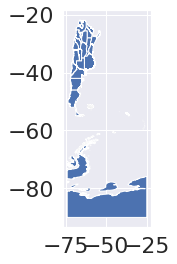

In [75]:
gdfRegiones.plot();

In [76]:
#disuelvo limites provinciales internos de cada región
gdfRegiones = gdfRegiones.dissolve(by='region')

In [77]:
gdfRegiones.head(10)

,geometry,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag
region,,,,,,,,,,
CABA,"POLYGON ((-58.34189 -34.63110, -58.34240 -34.6...",1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN
CENTRO,"POLYGON ((-63.38597 -35.25061, -63.38579 -35.2...",4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN
CUYO,"POLYGON ((-66.85378 -35.99951, -66.85378 -35.9...",3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN
NEA,"MULTIPOLYGON (((-57.80873 -27.32548, -57.80765...",8,0.0,Provincia,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN
NOA,"POLYGON ((-61.71412 -28.01634, -61.72865 -28.1...",6,0.0,Provincia,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN
PATAGONIA,"MULTIPOLYGON (((-73.47219 -77.52834, -73.43012...",2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN
PBA,"MULTIPOLYGON (((-62.35605 -40.35656, -62.35595...",24,0.0,Provincia,Provincia de Buenos Aires,Provincia,Buenos Aires,06,Geografía,IGN


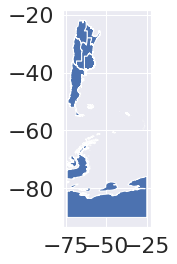

In [78]:
gdfRegiones.plot()

In [79]:
#hago un merge del gdf de regiones con el df de regiones
#gdfRegiones = gdfRegiones.merge(dfRegiones2, on='region')

In [80]:
gdfRegiones = gdfRegiones.reset_index()

In [81]:
#obtengo los centroides para ubicar las tortas (de géneros musicales) ahí
#centroides = gdfRegiones.centroid
#centroides = gdfRegiones.centroid
#x_coord = centroides.x
#y_coord = centroides.y
gdfRegiones['centroideX'] = gdfRegiones['geometry'].centroid.x
gdfRegiones['centroideY'] = gdfRegiones['geometry'].centroid.y

<ipython-input-81-686d31b2758d>:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-81-686d31b2758d>:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [116]:
gdfRegiones.head(5)

,region,geometry,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,centroideX,centroideY
0,CABA,"POLYGON ((-58.34189 -34.63110, -58.34240 -34.6...",1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,-58.445908,-34.614487
1,CENTRO,"POLYGON ((-63.38597 -35.25061, -63.38579 -35.2...",4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,-62.881993,-33.214551
2,CUYO,"POLYGON ((-66.85378 -35.99951, -66.85378 -35.9...",3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,-67.858825,-32.572816
3,NEA,"MULTIPOLYGON (((-57.80873 -27.32548, -57.80765...",8,0.0,Provincia,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,-59.020191,-26.795560
4,NOA,"POLYGON ((-61.71412 -28.01634, -61.72865 -28.1...",6,0.0,Provincia,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,-64.950275,-26.013367


In [119]:
gdfRegiones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   region      7 non-null      object  
 1   geometry    7 non-null      geometry
 2   gid         7 non-null      int64   
 3   entidad     7 non-null      float64 
 4   objeto      7 non-null      object  
 5   fna         7 non-null      object  
 6   gna         7 non-null      object  
 7   nam         7 non-null      object  
 8   in1         7 non-null      object  
 9   fdc         7 non-null      object  
 10  sag         7 non-null      object  
 11  centroideX  7 non-null      float64 
 12  centroideY  7 non-null      float64 
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 856.0+ bytes


ValueError: ignored

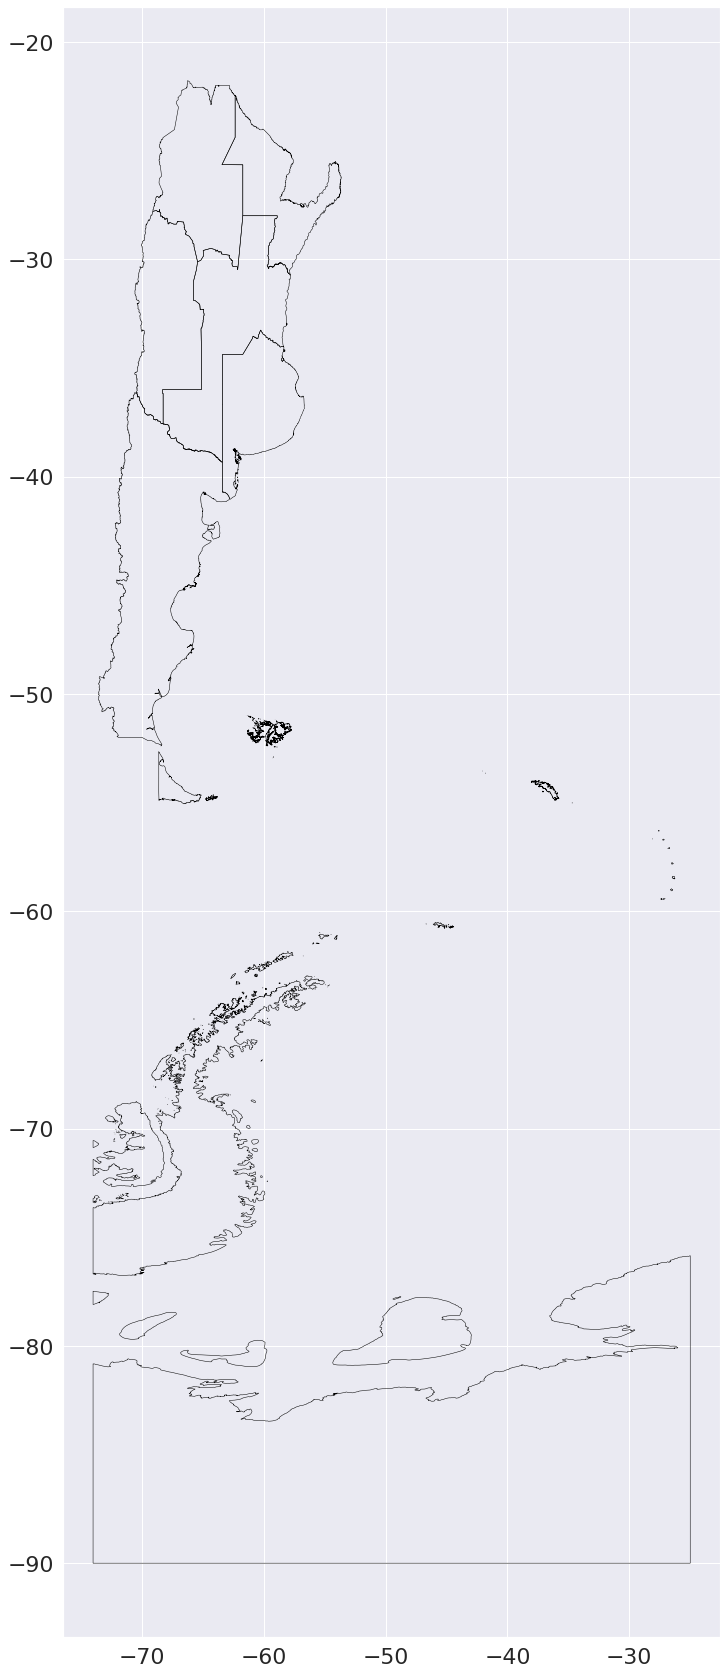

In [82]:
#Este no funciona.
#fig, ax = plt.subplots(figsize=(30,30))
#ax = gdfRegiones.boundary.plot(ax=ax,zorder=1,edgecolor='black',linewidth=0.5) 
#for indice in gdfRegiones.index: 
#  regionAuxiliar = gdfRegiones['region'][indice]
#  dfAuxiliar = dfRegiones2.loc[dfRegiones2['region'] == regionAuxiliar]
#  ax = fig.add_subplot(gdfRegiones['centroideX'][indice],gdfRegiones['centroideY'][indice])
#  ax.pie(dfAuxiliar['value'],labels=dfAuxiliar['variable'],colors=colors,autopct='%0.2f%%')
  #torta = ax.pie(dfAuxiliar['value'],labels=dfAuxiliar['variable'],colors=colors,autopct='%0.2f%%')
  #ax.scatter(gdfRegiones['centroideX'][indice],gdfRegiones['centroideY'][indice],marker=(ax.pie(dfAuxiliar['value'],labels=dfAuxiliar['variable'],colors=colors,autopct='%0.2f%%')[0][indice].get_path().vertices.tolist()), s=5)

#plt.show()

In [83]:
#dibujo los piechart porción a porción
#def draw_pie(dist, xpos, ypos, size, ax):
#    # for incremental pie slices
#    cumsum = np.cumsum(dist)
#    cumsum = cumsum / cumsum[-1]
 #   pie = [0] + cumsum.tolist()

    #colors = ['lime','crimson','royalblue','gold','deeppink','seagreen','red','indigo','tomato','greenyellow','maroon','hotpink','turquoise','magenta','goldenrod']
    
   # for i, (r1, r2) in enumerate(zip(pie[:-1], pie[1:])):
   #     angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
   #     x = [0] + np.cos(angles).tolist()
   #     y = [0] + np.sin(angles).tolist()#

        #xy = np.column_stack([x, y])
        #ax.scatter([xpos], [ypos], marker=xy, s=size, color=colors[i], alpha=1)

    #return ax

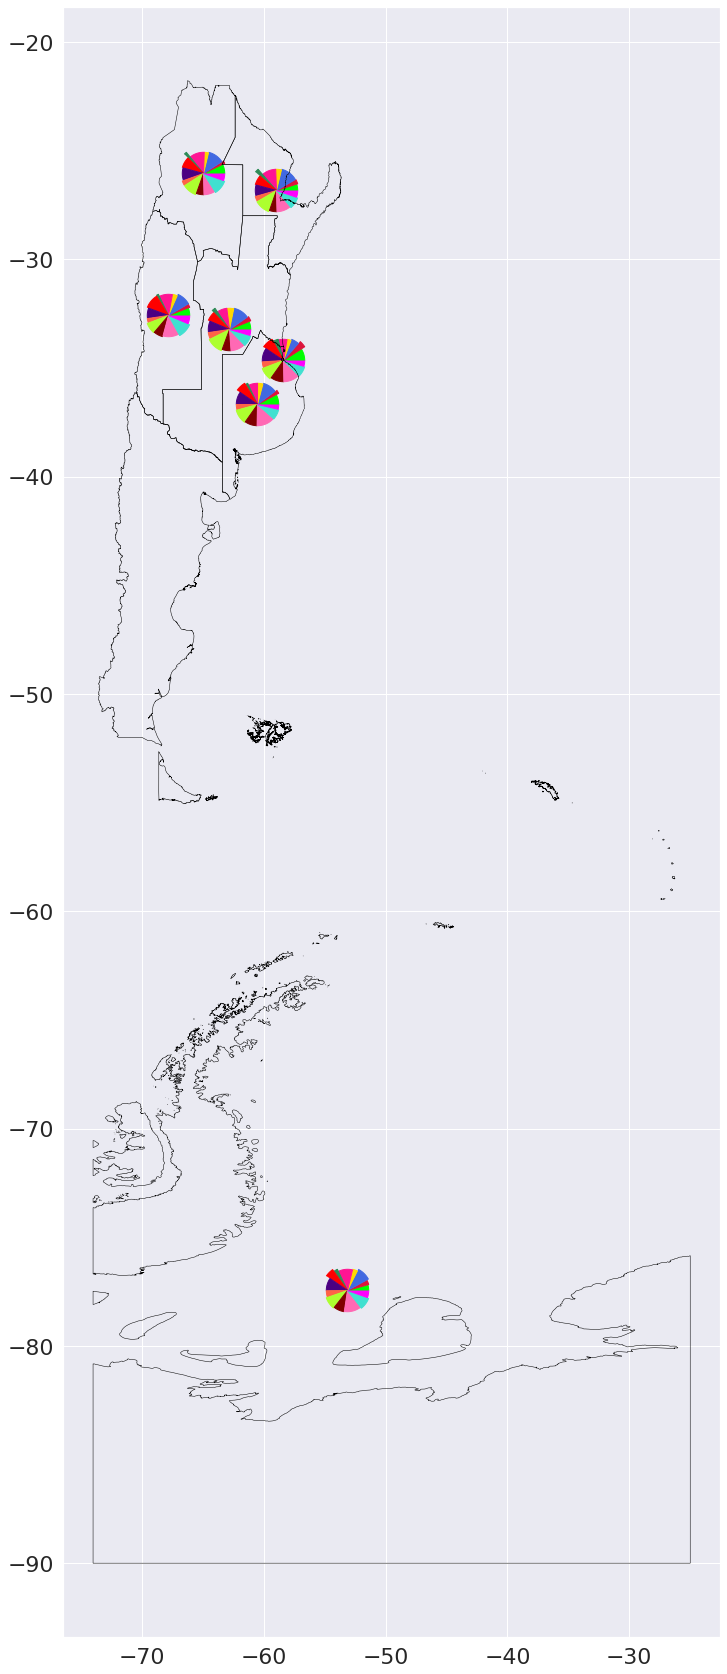

In [84]:
# Este quedn feos
#fig, ax = plt.subplots(figsize = (60,30))
#ax = gdfRegiones.boundary.plot(ax=ax,edgecolor='black',linewidth=0.5) 

#for indice in gdfRegiones.index: 
#  regionAuxiliar = gdfRegiones['region'][indice]
#  dfAuxiliar = dfRegiones2.loc[dfRegiones2['region'] == regionAuxiliar]
#  ax = draw_pie(dfAuxiliar['value'].to_numpy(),gdfRegiones['centroideX'][indice],gdfRegiones['centroideY'][indice],1800,ax)
  

In [85]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 23.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 50.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing 

In [86]:
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [135]:
def plot_pie_inset(data,etiquetas,ilon,ilat,ax,width,region):

    if region=='CABA':
        ilon = ilon + 2

    if region=='CENTRO':
        ilon = ilon + 1
        ilat = ilat + 1   

    ax_sub= inset_axes(ax, width=width, height=width, loc=10, 
                       bbox_to_anchor=(ilon, ilat),
                       bbox_transform=ax.transData, 
                       borderpad=0)
    
    explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1,0.1,0.1,0.1)
    wedges,texts= ax_sub.pie(data, explode=explode,labels=etiquetas, textprops={'fontsize': 2})

    ax_sub.set_aspect("equal")

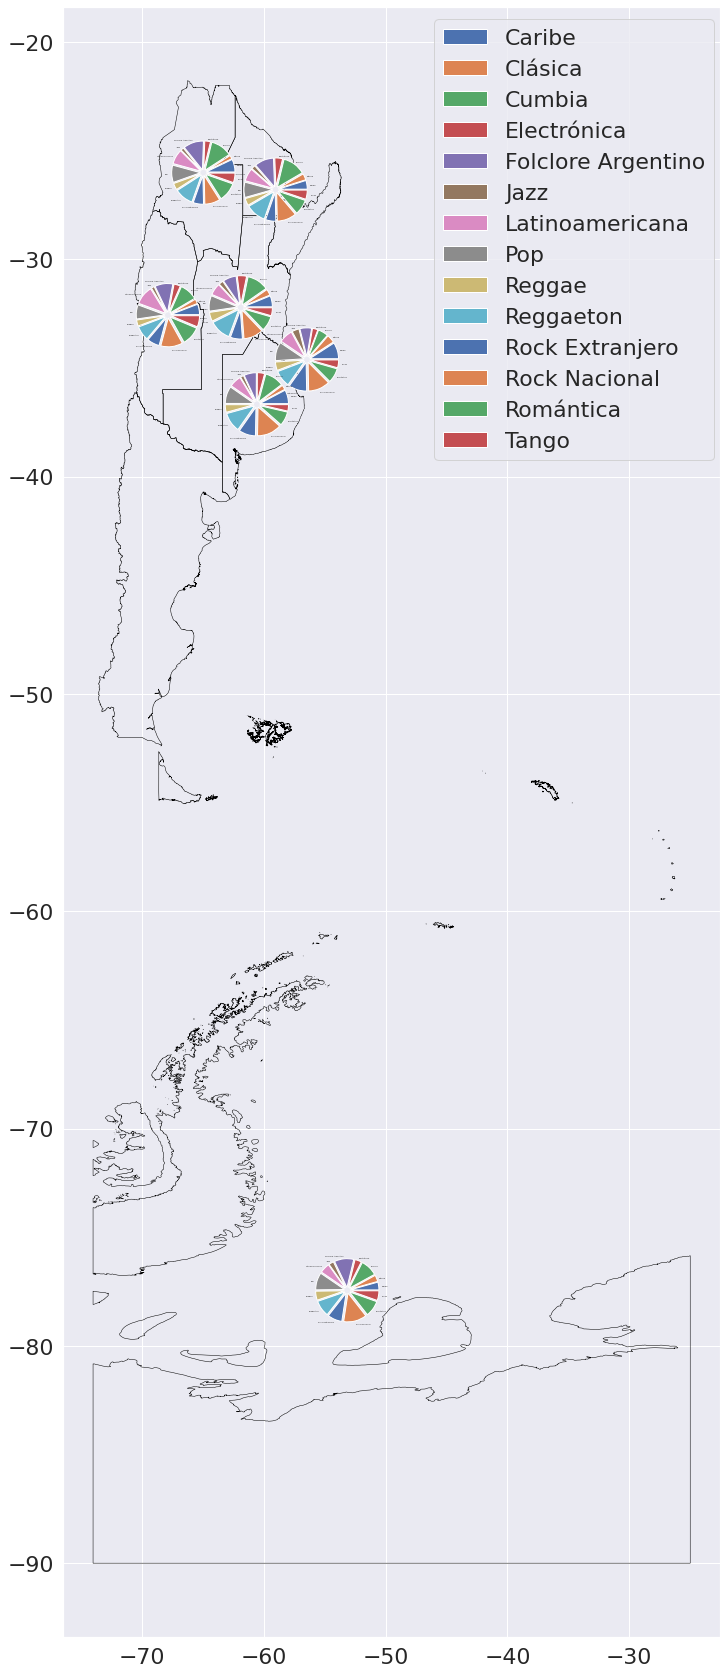

In [142]:
fig, ax = plt.subplots(figsize = (80,30))
ax = gdfRegiones.boundary.plot(ax=ax,edgecolor='black',linewidth=0.5) 
for indice in gdfRegiones.index: 
  regionAuxiliar = gdfRegiones['region'][indice]
  dfAuxiliar = dfRegiones2.loc[dfRegiones2['region'] == regionAuxiliar]
  plot_pie_inset(dfAuxiliar['value'],dfAuxiliar['variable'],gdfRegiones['centroideX'][indice],gdfRegiones['centroideY'][indice],ax,1,regionAuxiliar)

plt.legend(loc='upper right', bbox_to_anchor=(7,6));